In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [7]:
w = pd.read_csv('wine.csv')
w

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
#To find whether there are any existing null values or not
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
#Count of duplicated rows
w[w.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


<AxesSubplot:>

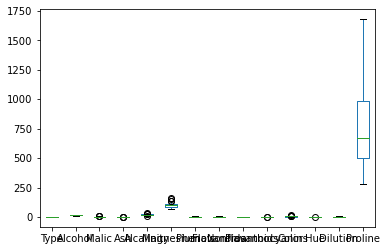

In [10]:
#Outlier Detection
w.plot(kind='box')

<AxesSubplot:>

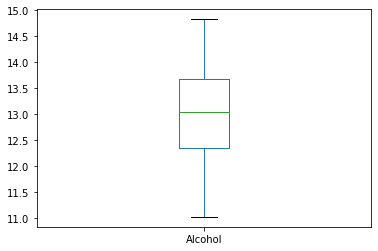

In [11]:
w.Alcohol.plot(kind='box')

<AxesSubplot:>

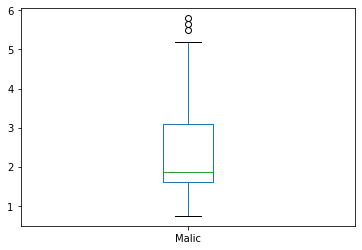

In [12]:
w.Malic.plot(kind='box')

In [13]:
w.Malic.describe()

count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: Malic, dtype: float64

In [14]:
IQR = 3.082500 - 1.602500
IQR

1.48

In [15]:
#Calculation of upper fence
upper_fence = 3.082500 + (1.5*IQR)
upper_fence

5.3025

In [16]:
index=w[w.Malic>3.6224999999999996].index
w = w.drop(index,axis=0)

<AxesSubplot:>

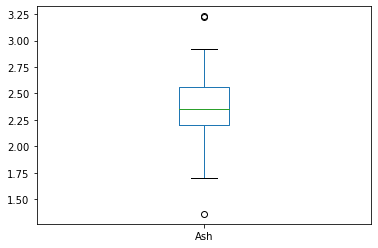

In [17]:
w.Ash.plot(kind='box')

In [18]:
w.Ash.describe()

count    149.000000
mean       2.359262
std        0.284786
min        1.360000
25%        2.200000
50%        2.350000
75%        2.560000
max        3.230000
Name: Ash, dtype: float64

In [19]:
IQR = 2.560000 - 2.200000
IQR

0.3599999999999999

In [20]:
#Calculation of upper fence
upper_fence = 2.560000 + (1.5*IQR)
upper_fence

3.0999999999999996

In [21]:
#Calculation of lower fence
lower_fence = 2.200000 - (1.5*IQR)
lower_fence

1.6600000000000004

In [22]:
index=w[w.Ash<1.6600000000000004].index
w = w.drop(index,axis=0)

In [23]:
index=w[w.Ash>3.0999999999999996].index
w = w.drop(index,axis=0)

<AxesSubplot:>

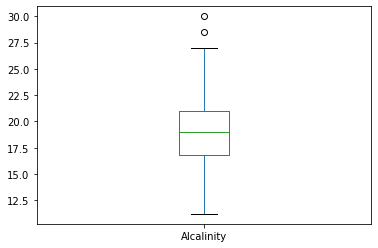

In [24]:
w.Alcalinity.plot(kind='box')

In [25]:
w.Alcalinity.describe()

count    146.000000
mean      19.140411
std        3.212145
min       11.200000
25%       16.800000
50%       19.000000
75%       21.000000
max       30.000000
Name: Alcalinity, dtype: float64

In [26]:
IQR = 21.000000 - 16.800000
IQR

4.199999999999999

In [27]:
#Calculation of upper fence
upper_fence = 21.000000 + (1.5*IQR)
upper_fence

27.299999999999997

In [28]:
#Calculation of lower fence
lower_fence = 16.800000 - (1.5*IQR)
lower_fence

10.500000000000002

In [29]:
index=w[w.Alcalinity<10.500000000000002].index
w = w.drop(index,axis=0)

In [30]:
index=w[w.Alcalinity>27.299999999999997].index
w = w.drop(index,axis=0)

<AxesSubplot:>

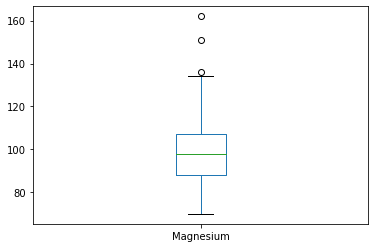

In [31]:
w.Magnesium.plot(kind='box')

In [32]:
w.Magnesium.describe()

count    144.000000
mean      99.673611
std       14.226357
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: Magnesium, dtype: float64

In [33]:
IQR = 107.000000 - 88.000000
IQR

19.0

In [34]:
#Calculation of upper fence
upper_fence = 107.000000 + (1.5*IQR)
upper_fence

135.5

In [35]:
index=w[w.Magnesium>135.5].index
w = w.drop(index,axis=0)

<AxesSubplot:>

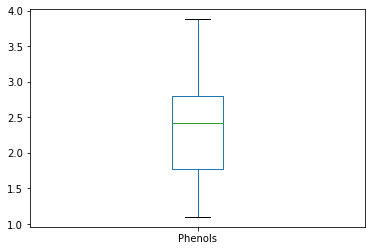

In [36]:
w.Phenols.plot(kind='box')

<AxesSubplot:>

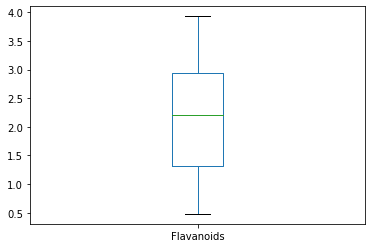

In [37]:
w.Flavanoids.plot(kind='box')

<AxesSubplot:>

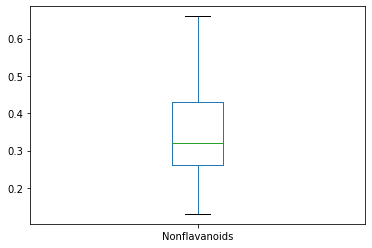

In [38]:
w.Nonflavanoids.plot(kind='box')

<AxesSubplot:>

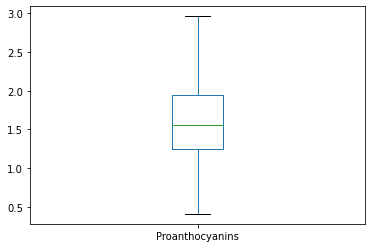

In [39]:
w.Proanthocyanins.plot(kind='box')

In [40]:
w.Proanthocyanins.describe()

count    141.000000
mean       1.584043
std        0.537644
min        0.410000
25%        1.250000
50%        1.560000
75%        1.950000
max        2.960000
Name: Proanthocyanins, dtype: float64

In [41]:
IQR = 1.950000 - 1.250000
IQR

0.7

In [42]:
#Calculation of upper fence
upper_fence = 1.950000 + (1.5*IQR)
upper_fence

3.0

In [43]:
index=w[w.Proanthocyanins>3.0].index
w = w.drop(index,axis=0)

<AxesSubplot:>

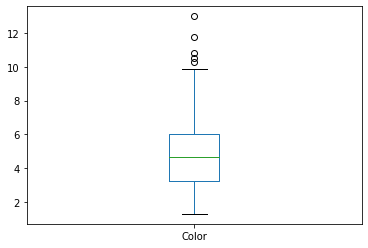

In [44]:
w.Color.plot(kind='box')

In [45]:
w.Color.describe()

count    141.000000
mean       4.975957
std        2.250456
min        1.280000
25%        3.250000
50%        4.680000
75%        6.000000
max       13.000000
Name: Color, dtype: float64

In [46]:
IQR = 6.000000 - 3.250000
IQR

2.75

In [47]:
#Calculation of upper fence
upper_fence = 6.000000 + (1.5*IQR)
upper_fence

10.125

In [48]:
index=w[w.Color>10.125].index
w = w.drop(index,axis=0)

<AxesSubplot:>

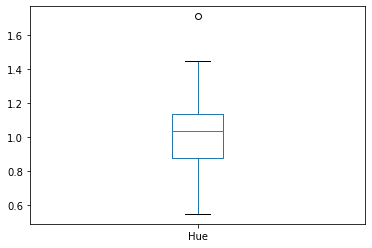

In [49]:
w.Hue.plot(kind='box')

In [50]:
w.Hue.describe()

count    136.000000
mean       1.005559
std        0.210596
min        0.550000
25%        0.880000
50%        1.035000
75%        1.135000
max        1.710000
Name: Hue, dtype: float64

In [51]:
IQR = 1.135000 - 0.880000
IQR

0.255

In [52]:
#Calculation of upper fence
upper_fence = 1.135000 + (1.5*IQR)
upper_fence

1.5175

In [53]:
index=w[w.Hue>1.5175].index
w = w.drop(index,axis=0)

<AxesSubplot:>

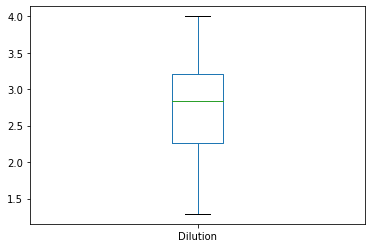

In [54]:
w.Dilution.plot(kind='box')

<AxesSubplot:>

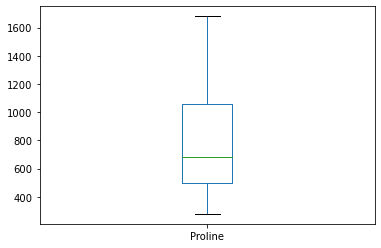

In [55]:
w.Proline.plot(kind='box')

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

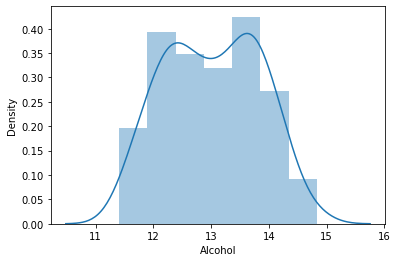

In [56]:
#To check whether the distribution is normal
sns.distplot(w['Alcohol'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Malic', ylabel='Density'>

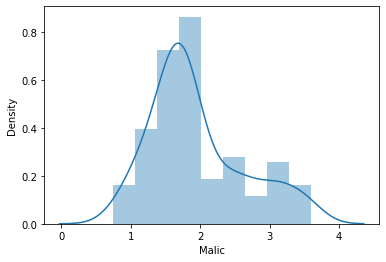

In [57]:
sns.distplot(w['Malic'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ash', ylabel='Density'>

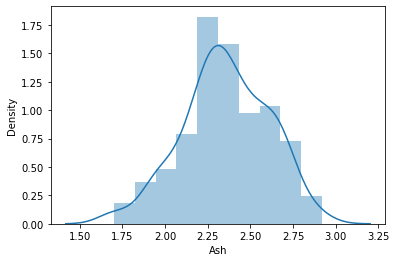

In [58]:
sns.distplot(w['Ash'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alcalinity', ylabel='Density'>

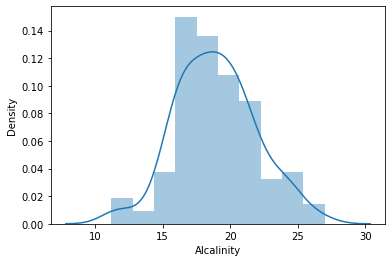

In [59]:
sns.distplot(w['Alcalinity'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Magnesium', ylabel='Density'>

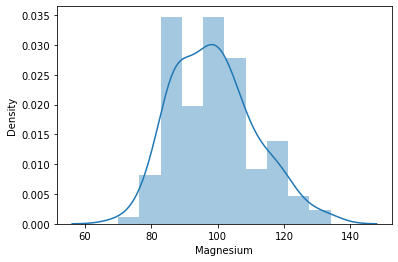

In [60]:
sns.distplot(w['Magnesium'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Phenols', ylabel='Density'>

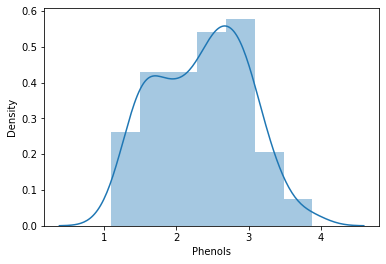

In [61]:
sns.distplot(w['Phenols'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flavanoids', ylabel='Density'>

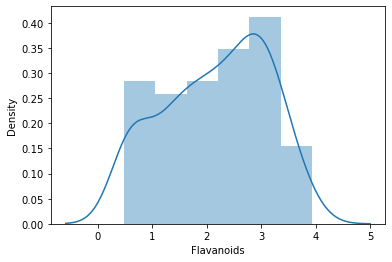

In [62]:
sns.distplot(w['Flavanoids'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Nonflavanoids', ylabel='Density'>

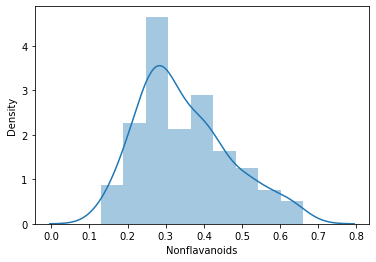

In [63]:
sns.distplot(w['Nonflavanoids'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Proanthocyanins', ylabel='Density'>

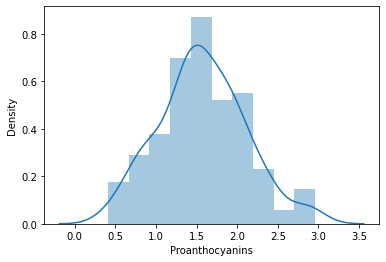

In [64]:
sns.distplot(w['Proanthocyanins'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Color', ylabel='Density'>

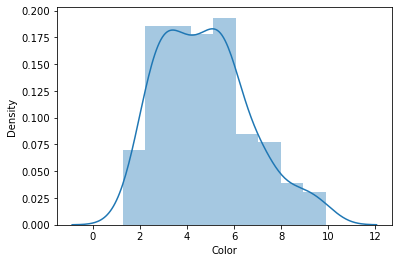

In [65]:
sns.distplot(w['Color'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hue', ylabel='Density'>

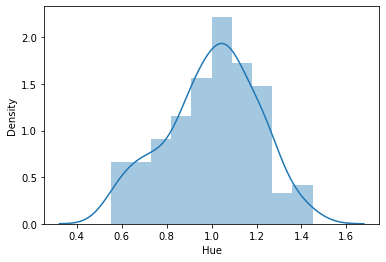

In [66]:
sns.distplot(w['Hue'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dilution', ylabel='Density'>

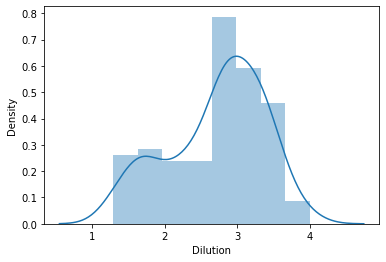

In [67]:
sns.distplot(w['Dilution'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Proline', ylabel='Density'>

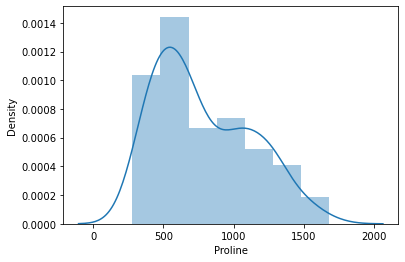

In [68]:
sns.distplot(w['Proline'])

# Hierarchical Clustering on Original Data

In [69]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy import stats

In [70]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
# Standardization function 
def std_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [71]:
df_norm = std_func(w.iloc[:,1:])
df_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.468751,-0.348245,0.301018,-1.114554,2.289620,0.713767,0.935883,-0.566718,1.348575,0.456813,0.195981,1.825242,0.832450
1,0.215346,-0.245307,-0.853227,-2.584459,0.099732,0.476470,0.621176,-0.734680,-0.549033,-0.201583,0.245397,1.039156,0.788415
2,0.166670,0.607604,1.256255,-0.112346,0.180838,0.713767,1.124707,-0.398755,2.325561,0.477715,0.146564,0.691464,1.184732
3,1.639117,0.004684,0.579629,-0.713671,1.154122,2.374849,1.386963,-0.902642,1.141905,1.585493,-0.693509,1.114741,2.050758
4,0.264022,0.945828,2.052286,0.689420,1.559657,0.713767,0.547745,0.357076,0.465530,-0.232935,0.195981,0.328655,-0.136324
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.677767,0.931122,1.335858,1.858663,0.505266,-1.263711,-1.392946,0.357076,-0.060540,2.034874,-1.286502,-1.379569,-0.092289
170,-1.001553,1.592864,-0.136799,0.021281,-0.224696,-1.738306,-1.760104,0.441057,-1.582384,0.383658,-1.681831,-1.334218,-0.796853
171,-0.307920,0.651720,-0.296006,0.188316,-1.035766,-1.516829,-1.739123,1.112906,-1.751477,2.682819,-2.126575,-1.636559,-0.914280
172,1.383569,0.828185,0.500025,0.355351,-0.630231,-1.058054,-1.539809,0.776982,-0.624186,2.578312,-1.879495,-1.515623,-0.356500


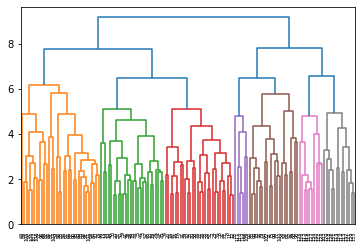

In [72]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [73]:
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')

In [74]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,5
1,2
2,5
3,5
4,2
...,...
130,4
131,3
132,3
133,3


In [75]:
w1=df_norm['h_clusterid']= pd.Series(y_hc)
w1

0      5
1      2
2      5
3      5
4      2
      ..
130    4
131    3
132    3
133    3
134    4
Length: 135, dtype: int64

In [76]:
result=df_norm.iloc[:,1:].groupby(df_norm.h_clusterid).mean()
result

,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
h_clusterid,,,,,,,,,,,,,
0.0,-0.290760,-0.312288,-0.088050,-0.103036,0.150725,0.077115,-0.017022,-0.266356,-0.551920,0.593555,-0.030718,-0.499281,0.0
1.0,-0.557796,-0.384138,0.345806,-0.630231,-0.381191,-0.215793,0.063141,0.095134,-0.733824,0.368231,0.188283,-0.613373,1.0
2.0,-0.299038,0.518395,-0.484962,0.430398,0.534273,0.705098,-0.408445,0.276203,0.179467,0.477272,0.576342,1.046416,2.0
3.0,0.431140,-0.198713,0.689420,-0.531100,-0.474478,-0.416190,-0.072162,-0.665937,-0.579551,-0.803322,-0.690904,-0.903516,3.0
4.0,-0.175982,-0.722451,0.369668,-0.375324,-0.364241,-0.331935,0.177116,-0.184005,-0.882374,-0.707628,-0.157249,-0.862276,4.0
5.0,-0.013364,0.159903,-0.988519,0.619553,1.100634,1.127091,-0.566718,1.106890,0.727820,0.324013,0.776669,1.080916,5.0


# Non Hierarchical Clustering on Original data

In [77]:
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [78]:
w2 = df_norm.fillna(0)
w2 = w.iloc[:,0:13]
w2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71


In [79]:
kmeans_clust=KMeans(n_clusters=5)
kmeans_clust.fit(w)
w["clusterID"]=pd.Series(kmeans_clust.labels_)
w

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,1.0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,1.0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,1.0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,2.0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750,NaN
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,NaN
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,NaN
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660,NaN


In [80]:
r = w.fillna(1)
r

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,1.0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,1.0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,1.0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,2.0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750,1.0
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,1.0
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,1.0
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660,1.0


In [81]:
result1=r.iloc[:,0:].groupby(w.clusterID).mean()
result1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterID
clusterID,,,,,,,,,,,,,,,
0.0,1.923077,12.381538,1.766154,2.351154,20.580769,96.461538,2.228077,2.116923,0.346538,1.543846,3.484231,1.025615,2.763846,590.730769,0.0
1.0,1.000000,13.707727,1.829545,2.372727,16.563636,102.863636,2.806364,3.043182,0.293636,2.000455,5.369545,1.074091,3.172273,1056.363636,1.0
2.0,1.000000,14.030000,1.800588,2.460588,16.611765,105.176471,2.947647,3.097059,0.282353,1.963529,6.220588,1.110588,3.148824,1314.529412,2.0
3.0,1.969697,12.492424,1.710000,2.211212,19.257576,91.575758,2.253030,2.042727,0.339394,1.529091,3.432727,1.067879,2.736364,565.757576,3.0
4.0,1.625000,12.990000,1.879375,2.399375,18.000000,103.000000,2.422500,2.266875,0.351875,1.403125,4.422500,0.990000,2.698125,776.125000,4.0


In [82]:
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(r)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(r.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,r.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([18517.86997739]),
 array([13413.20948672]),
 array([9884.29907913]),
 array([8170.88362151]),
 array([6675.46370787]),
 array([5459.89890812]),
 array([4908.82157624]),
 array([4398.83380181]),
 array([3976.770795]),
 array([3524.34208503]),
 array([3333.37239318]),
 array([3158.67681762]),
 array([3042.51398004])]

([<matplotlib.axis.XTick at 0x204e2062910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

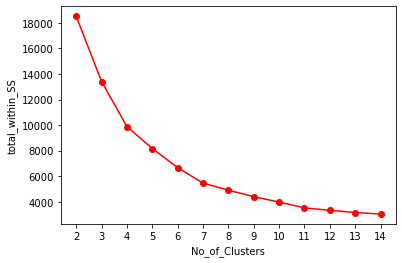

In [83]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

# PCA

In [84]:
# Considering only numerical data 
w.data = w.iloc[:,1:]
w = w.fillna(1)
w

<ipython-input-84-dca1b0b57030>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  w.data = w.iloc[:,1:]


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,1.0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,1.0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,1.0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,2.0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750,1.0
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,1.0
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,1.0
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660,1.0


In [85]:
# Converting into numpy array
W = w.values
W

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 3.920e+00, 1.065e+03,
        1.000e+00],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 3.400e+00, 1.050e+03,
        1.000e+00],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 3.170e+00, 1.185e+03,
        1.000e+00],
       ...,
       [3.000e+00, 1.277e+01, 2.390e+00, ..., 1.630e+00, 4.700e+02,
        1.000e+00],
       [3.000e+00, 1.416e+01, 2.510e+00, ..., 1.710e+00, 6.600e+02,
        1.000e+00],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 1.620e+00, 8.400e+02,
        1.000e+00]])

In [86]:
# Normalizing the numerical data 
w_normal = scale(W)
w_normal

array([[-1.08347268,  1.47422171, -0.34954192, ...,  1.83203968,
         0.83555084, -0.58660133],
       [-1.08347268,  0.21614801, -0.24622096, ...,  1.04302627,
         0.79135161, -0.58660133],
       [-1.08347268,  0.16729078,  0.60986701, ...,  0.69403957,
         1.18914462, -0.58660133],
       ...,
       [ 1.62520902, -0.30906722,  0.65414742, ..., -1.64265398,
        -0.917685  , -0.58660133],
       [ 1.62520902,  1.38872155,  0.83126907, ..., -1.52126731,
        -0.35782818, -0.58660133],
       [ 1.62520902,  0.17950509,  0.94935016, ..., -1.65782732,
         0.1725625 , -0.58660133]])

In [87]:
pca = PCA(n_components = 13)
pca_values1 = pd.DataFrame(pca.fit_transform(w_normal))
pca_values1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.474341,1.298374,0.326033,-0.329183,0.261029,-0.030108,1.045954,-0.636675,-0.412148,0.249325,1.253705,-0.531551,0.659897
1,2.160399,-0.453667,-1.413227,-0.499509,-0.483222,0.318144,1.774002,-0.000294,-0.941595,0.174198,-0.877324,-0.207631,0.203051
2,2.594896,0.921464,1.323661,-0.795802,0.095492,0.842909,-0.768314,-0.567068,0.734028,0.897765,-0.300196,0.145027,0.136972
3,4.065505,2.290104,-0.273746,-0.410533,0.576137,0.061003,-0.819784,-0.220192,-0.824656,-0.353983,-0.065626,0.474647,-0.159090
4,1.131670,1.037127,1.488666,2.184980,1.349441,0.976715,-0.472982,-0.671810,0.090007,-0.144617,0.450287,-0.225838,-0.047409
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,-2.732570,3.164746,0.751618,-0.424664,0.238172,-0.653203,-1.154499,0.494608,0.700294,0.123755,0.379389,-0.146399,0.557600
131,-4.128140,1.137942,-0.720314,-0.589169,0.411310,0.335180,0.728220,-0.078796,-0.194300,0.326447,-0.806145,-0.025020,0.343840
132,-4.175913,2.101317,-1.615996,-0.953265,-0.765596,-0.549174,-0.905876,0.182892,-0.649032,-0.290475,-0.754580,-0.183854,1.063548
133,-2.830012,3.137043,-1.105576,-0.933281,-0.634035,-0.265609,-1.315681,0.607001,-0.017329,-0.186141,-0.102776,-0.871007,0.437252


In [88]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(w_normal)
pca_values

array([[ 3.47434101,  1.29837374,  0.32603287, ...,  1.25370493,
        -0.53155105,  0.65989731],
       [ 2.16039948, -0.45366701, -1.41322675, ..., -0.87732437,
        -0.20763144,  0.20305133],
       [ 2.59489584,  0.92146424,  1.32366083, ..., -0.30019581,
         0.14502652,  0.13697248],
       ...,
       [-4.175913  ,  2.10131701, -1.61599626, ..., -0.75458005,
        -0.18385358,  1.0635482 ],
       [-2.83001187,  3.13704325, -1.10557565, ..., -0.10277615,
        -0.87100736,  0.4372517 ],
       [-2.84404257,  3.63384136, -0.77825579, ...,  0.65994153,
         0.40041579,  0.69899733]])

In [89]:
pca_values.var()

1.1413731483770921

In [90]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.38541487, 0.18188339, 0.08403999, 0.06860425, 0.05505681,
       0.04763336, 0.04287624, 0.03062045, 0.02671845, 0.02099982,
       0.01940222, 0.0142684 , 0.01167182])

In [91]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([38.54, 56.73, 65.13, 71.99, 77.5 , 82.26, 86.55, 89.61, 92.28,
       94.38, 96.32, 97.75, 98.92])

In [92]:
pca.components_

array([[-0.38546903,  0.23358667, -0.16854888,  0.04541663, -0.25880268,
         0.13117307,  0.36117983,  0.39046553, -0.24605197,  0.30883263,
         0.06394773,  0.22583018,  0.30799056,  0.30250995,  0.04361073],
       [ 0.04592554,  0.38151268,  0.30366709,  0.32313828,  0.00574957,
         0.38877689, -0.01819743, -0.07149159,  0.06420098, -0.04950665,
         0.49504832, -0.2914358 , -0.22623754,  0.30154997, -0.14278657],
       [-0.0593741 , -0.18897119,  0.01261339,  0.60462697,  0.52694645,
         0.12682486,  0.06808837,  0.07486403,  0.05731474,  0.1072209 ,
        -0.2407188 ,  0.16991724,  0.17465464, -0.05529988, -0.39480747],
       [-0.10686431,  0.00179356, -0.12451641,  0.35164957, -0.02368441,
         0.24821817, -0.03574498, -0.07463639,  0.26816964, -0.30745339,
        -0.1422886 ,  0.30826632, -0.10796324,  0.0935668 ,  0.6915678 ],
       [ 0.09934608, -0.14302446,  0.28608645,  0.03833249,  0.17362301,
         0.28416029,  0.07574652,  0.05045166, 

In [93]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.385469,0.233587,-0.168549,0.045417,-0.258803,0.131173,0.361180,0.390466,-0.246052,0.308833,0.063948,0.225830,0.307991,0.302510,0.043611
1,0.045926,0.381513,0.303667,0.323138,0.005750,0.388777,-0.018197,-0.071492,0.064201,-0.049507,0.495048,-0.291436,-0.226238,0.301550,-0.142787
2,-0.059374,-0.188971,0.012613,0.604627,0.526946,0.126825,0.068088,0.074864,0.057315,0.107221,-0.240719,0.169917,0.174655,-0.055300,-0.394807
3,-0.106864,0.001794,-0.124516,0.351650,-0.023684,0.248218,-0.035745,-0.074636,0.268170,-0.307453,-0.142289,0.308266,-0.107963,0.093567,0.691568
4,0.099346,-0.143024,0.286086,0.038332,0.173623,0.284160,0.075747,0.050452,-0.641864,0.050067,-0.137707,-0.343821,0.114452,-0.201488,0.402264
5,-0.106000,0.090759,0.781641,0.028473,-0.148687,-0.257805,0.022316,0.026531,0.334186,0.105937,-0.217840,0.007972,0.307823,0.023544,0.115103
6,-0.137667,-0.048153,0.171988,-0.164267,-0.360446,0.497981,-0.203129,-0.129145,-0.178588,-0.365818,-0.335483,0.238932,0.034265,0.008820,-0.386928
7,-0.063317,0.447688,0.028429,0.026414,0.309570,-0.419561,-0.251011,-0.128554,-0.416583,-0.384612,0.014772,0.214732,0.168259,0.215534,0.010065
8,0.160446,0.009453,0.254781,-0.040107,0.043237,0.015774,-0.214620,0.009805,-0.205054,0.487905,0.071220,0.590596,-0.470503,-0.030926,0.055371
9,-0.231721,-0.149144,-0.162477,0.163298,-0.139205,-0.066879,-0.586580,-0.197996,-0.053689,0.378140,-0.228127,-0.321544,0.022081,0.398859,0.054647


In [94]:
weights=pd.DataFrame(pca.components_)
sum(weights.iloc[:,0]**2)

0.31471994657781827

In [95]:
pca_values1.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000e+00,-2.650540e-17,-7.920477e-17,-1.078935e-17,-1.313533e-16,-2.994312e-17,5.160574e-17,3.028074e-17,6.226676e-17,5.728502e-17,-3.804053e-17,-6.653894e-17,-2.125323e-17
1,-2.650540e-17,1.000000e+00,-2.270469e-16,8.441928e-17,-1.873740e-16,-1.884877e-17,4.966727e-17,-1.234219e-16,5.780566e-17,-1.188737e-16,7.383341e-17,1.291464e-17,0.000000e+00
2,-7.920477e-17,-2.270469e-16,1.000000e+00,-1.083074e-16,-2.760560e-17,2.400305e-16,4.543881e-17,-4.323111e-18,-4.425557e-17,2.068539e-16,-1.126924e-16,-5.937258e-17,3.501087e-18
3,-1.078935e-17,8.441928e-17,-1.083074e-16,1.000000e+00,8.095633e-17,-3.117005e-17,1.250969e-17,-1.190219e-16,3.243849e-16,-5.723626e-17,-1.840857e-17,1.524549e-16,-9.687470e-19
4,-1.313533e-16,-1.873740e-16,-2.760560e-17,8.095633e-17,1.000000e+00,-3.800602e-16,2.371096e-16,-7.277302e-17,1.387029e-16,-1.203251e-16,-1.677467e-17,-4.107820e-17,-1.032723e-16
5,-2.994312e-17,-1.884877e-17,2.400305e-16,-3.117005e-17,-3.800602e-16,1.000000e+00,4.331013e-16,2.038507e-16,-8.289241e-17,-2.002183e-16,2.064949e-16,2.886386e-16,-1.697396e-16
6,5.160574e-17,4.966727e-17,4.543881e-17,1.250969e-17,2.371096e-16,4.331013e-16,1.000000e+00,-7.716871e-17,3.512514e-16,-7.399871e-17,8.126195e-17,-1.933992e-16,4.105087e-17
7,3.028074e-17,-1.234219e-16,-4.323111e-18,-1.190219e-16,-7.277302e-17,2.038507e-16,-7.716871e-17,1.000000e+00,-2.824864e-16,3.567431e-16,-4.611132e-16,-3.436079e-16,2.291064e-16
8,6.226676e-17,5.780566e-17,-4.425557e-17,3.243849e-16,1.387029e-16,-8.289241e-17,3.512514e-16,-2.824864e-16,1.000000e+00,-2.566288e-16,-1.294292e-16,-2.070875e-16,-1.835614e-16
9,5.728502e-17,-1.188737e-16,2.068539e-16,-5.723626e-17,-1.203251e-16,-2.002183e-16,-7.399871e-17,3.567431e-16,-2.566288e-16,1.000000e+00,3.469865e-16,3.135632e-16,-3.221780e-16


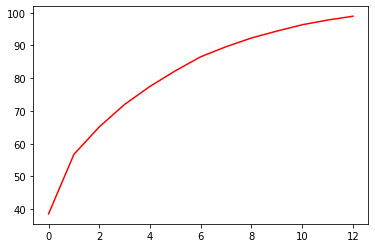

In [96]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

<AxesSubplot:>

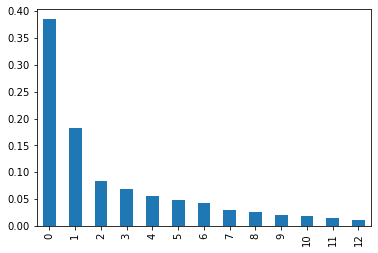

In [97]:
pd.Series(var).plot(kind="bar")

In [98]:
 pca_values[:,0:1]

array([[ 3.47434101],
       [ 2.16039948],
       [ 2.59489584],
       [ 4.06550497],
       [ 1.13166957],
       [ 3.35037891],
       [ 2.66254436],
       [ 2.18428972],
       [ 2.71226233],
       [ 2.92198553],
       [ 3.54626757],
       [ 1.88802975],
       [ 2.25534529],
       [ 3.76014457],
       [ 4.68258249],
       [ 2.5601344 ],
       [ 2.46434344],
       [ 2.12455779],
       [ 3.91438832],
       [ 2.22573417],
       [ 3.30820077],
       [ 2.42720597],
       [ 1.59979297],
       [ 1.62987435],
       [ 1.93827858],
       [ 1.1458003 ],
       [ 2.2550067 ],
       [ 2.31141153],
       [ 2.58165452],
       [ 2.82119173],
       [ 1.63852575],
       [ 2.14712211],
       [ 1.52996844],
       [ 1.86145509],
       [ 1.50870136],
       [ 1.19928885],
       [ 1.37368756],
       [ 2.72511595],
       [ 3.15357236],
       [ 2.04025114],
       [ 2.73720457],
       [ 2.94027151],
       [ 2.20508006],
       [ 3.02601511],
       [ 3.34127611],
       [ 2

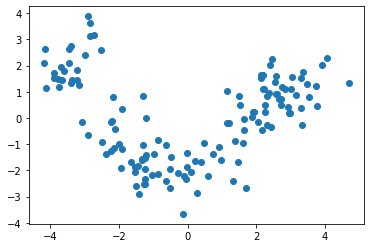

In [99]:
# plot between PCA1 and PCA2 
x = pca_values[:,0]
y = pca_values[:,1]
plt.scatter(x,y)

In [100]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), w[['Type']]], axis = 1)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

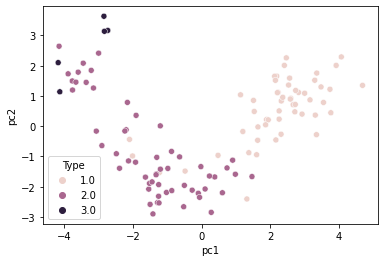

In [101]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type')

In [102]:
pca1 = pd.DataFrame(pca.components_)
pca1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.385469,0.233587,-0.168549,0.045417,-0.258803,0.131173,0.361180,0.390466,-0.246052,0.308833,0.063948,0.225830,0.307991,0.302510,0.043611
1,0.045926,0.381513,0.303667,0.323138,0.005750,0.388777,-0.018197,-0.071492,0.064201,-0.049507,0.495048,-0.291436,-0.226238,0.301550,-0.142787
2,-0.059374,-0.188971,0.012613,0.604627,0.526946,0.126825,0.068088,0.074864,0.057315,0.107221,-0.240719,0.169917,0.174655,-0.055300,-0.394807
3,-0.106864,0.001794,-0.124516,0.351650,-0.023684,0.248218,-0.035745,-0.074636,0.268170,-0.307453,-0.142289,0.308266,-0.107963,0.093567,0.691568
4,0.099346,-0.143024,0.286086,0.038332,0.173623,0.284160,0.075747,0.050452,-0.641864,0.050067,-0.137707,-0.343821,0.114452,-0.201488,0.402264
5,-0.106000,0.090759,0.781641,0.028473,-0.148687,-0.257805,0.022316,0.026531,0.334186,0.105937,-0.217840,0.007972,0.307823,0.023544,0.115103
6,-0.137667,-0.048153,0.171988,-0.164267,-0.360446,0.497981,-0.203129,-0.129145,-0.178588,-0.365818,-0.335483,0.238932,0.034265,0.008820,-0.386928
7,-0.063317,0.447688,0.028429,0.026414,0.309570,-0.419561,-0.251011,-0.128554,-0.416583,-0.384612,0.014772,0.214732,0.168259,0.215534,0.010065
8,0.160446,0.009453,0.254781,-0.040107,0.043237,0.015774,-0.214620,0.009805,-0.205054,0.487905,0.071220,0.590596,-0.470503,-0.030926,0.055371
9,-0.231721,-0.149144,-0.162477,0.163298,-0.139205,-0.066879,-0.586580,-0.197996,-0.053689,0.378140,-0.228127,-0.321544,0.022081,0.398859,0.054647


In [103]:
pca1 = pca1.iloc[:,0:3]
pca1

,0,1,2
0,-0.385469,0.233587,-0.168549
1,0.045926,0.381513,0.303667
2,-0.059374,-0.188971,0.012613
3,-0.106864,0.001794,-0.124516
4,0.099346,-0.143024,0.286086
5,-0.106000,0.090759,0.781641
6,-0.137667,-0.048153,0.171988
7,-0.063317,0.447688,0.028429
8,0.160446,0.009453,0.254781
9,-0.231721,-0.149144,-0.162477


In [104]:
# Hierarchical Clustering After PCA

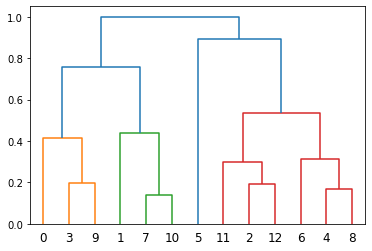

In [105]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(pca1, method='complete'))

In [106]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [107]:
# save clusters for chart
y_hc = hc.fit_predict(pca1)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,0
2,4
3,1
4,3
5,2
6,3
7,0
8,3
9,1


In [108]:
pca2=pca1['h_clusterid']= pd.Series(y_hc)
pca2

<ipython-input-108-7a42affeafc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca2=pca1['h_clusterid']= pd.Series(y_hc)


0     1
1     0
2     4
3     1
4     3
5     2
6     3
7     0
8     3
9     1
10    0
11    4
12    4
dtype: int64

In [109]:
result1=pca1.iloc[:,1:].groupby(pca1.h_clusterid).mean()
result1

,1,2,h_clusterid
h_clusterid,,,
0,0.424375,0.073899,0
1,0.028745,-0.151847,1
2,0.090759,0.781641,2
3,-0.060575,0.237619,3
4,-0.316570,0.058872,4


# Non Hierarchical Clustering After PCA

In [110]:
pca3 = pca1.iloc[:,0:3]
pca3

,0,1,2
0,-0.385469,0.233587,-0.168549
1,0.045926,0.381513,0.303667
2,-0.059374,-0.188971,0.012613
3,-0.106864,0.001794,-0.124516
4,0.099346,-0.143024,0.286086
5,-0.106000,0.090759,0.781641
6,-0.137667,-0.048153,0.171988
7,-0.063317,0.447688,0.028429
8,0.160446,0.009453,0.254781
9,-0.231721,-0.149144,-0.162477


In [111]:
kmeans_clust=KMeans(n_clusters=5)
kmeans_clust.fit(pca3)
pca3["clusterID"]=pd.Series(kmeans_clust.labels_)
pca3

,0,1,2,clusterID
0,-0.385469,0.233587,-0.168549,1
1,0.045926,0.381513,0.303667,2
2,-0.059374,-0.188971,0.012613,4
3,-0.106864,0.001794,-0.124516,1
4,0.099346,-0.143024,0.286086,3
5,-0.106000,0.090759,0.781641,0
6,-0.137667,-0.048153,0.171988,3
7,-0.063317,0.447688,0.028429,2
8,0.160446,0.009453,0.254781,3
9,-0.231721,-0.149144,-0.162477,1


In [112]:
result4=pca3.iloc[:,0:].groupby(pca3.clusterID).mean()
result4

,0,1,2,clusterID
clusterID,,,,
0,-0.106000,0.090759,0.781641,0
1,-0.241352,0.028745,-0.151847,1
2,-0.034525,0.424375,0.073899,2
3,0.040708,-0.060575,0.237619,3
4,-0.026262,-0.316570,0.058872,4


In [113]:
k = list(range(2,7))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca3)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(pca3.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,pca3.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([8.45745009]),
 array([5.98530809]),
 array([3.59812351]),
 array([1.95468671]),
 array([1.58487734])]

([<matplotlib.axis.XTick at 0x204e1f7dca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

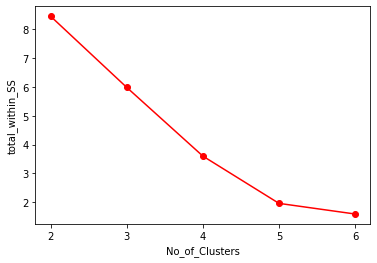

In [114]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [115]:
#Inferences
#There is a lot of difference in forming clusters on original data and on PCA data.
#THe majar difference is performance is increased to a greater extent after PCA is performed.
#Dendrogram allows to classify clusters easily after PCA is performed.
#Elbow curve allows to consider appropriate K-value after PCA is performed.